# Datasets Cross Ref

This notebook crosses 4 different datasets: Devign, NVD, CVE-Details and Big-Vul.

In [1]:
import pandas as pd

In [4]:
# CVE Details
df_cvedet = pd.read_csv('../github/cve_details_jan22.csv')
df_cvedet.keys()

Index(['cve_id', 'cve_href', 'cwe_id', 'vuln_type', 'publish_date',
       'update_date', 'score', 'acces_level', 'access', 'complexity',
       'authentication', 'confidentiality', 'integrity', 'availability',
       'summary', 'refs', 'code_refs', 'source'],
      dtype='object')

In [38]:
cve_details = []
for idx, row in df_cvedet.iterrows():
    cve_details += [ref.split('/commit/')[-1] for ref in eval(row['code_refs'])]

In [39]:
df_bigvul = pd.read_csv('../github/big_vul_msr20.csv')
print(len(df_bigvul))

4432


In [40]:
df_ffmpeg = pd.read_csv('../data/devign/ffmpeg.csv')
df_qemu = pd.read_csv('../data/devign/qemu.csv')
df_devign = pd.concat([df_ffmpeg, df_qemu])
df_devign = df_devign[df_devign['vulnerability'] == 1]


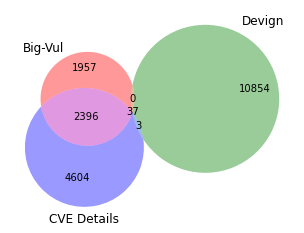

In [41]:
import pylab as plt
from matplotlib_venn import venn3, venn3_circles

big_vul = set(list(df_bigvul['commit_id']))
devign = set(list(df_devign['sha_id']))
cve_det = set(cve_details)

venn3([big_vul, devign, cve_det], ('Big-Vul', 'Devign', 'CVE Details'))

plt.show()

In [ ]:
labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17)], fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['list 1', 'list 2', 'list 3', 'list 4'])
fig.show()